- **Họ và tên: Nguyễn Vũ Dương**
- **MSSV: 20520465**

#Cài đặt các độ đo tương tự sử dụng trong so sánh chuỗi mà không dùng thư viện hỗ trợ (code from scratch).

##Levenshtein

- Khoảng cách Levenshtein thể hiện khoảng cách khác biệt giữa 2 chuỗi ký tự.
- Khoảng cách Levenshtein giữa chuỗi S1 và chuỗi S2 là số bước ít nhất biến chuỗi S1 thành chuỗi S2 thông qua 3 phép biến đổi là:
    + Xoá 1 ký tự.
    + Thêm 1 ký tự.
    + Thay ký tự này bằng ký tự khác.
- Ý tưởng code:
- VD: Như ta muốn tìm khoảng cách (khác nhau) giữa 2 text là "find" and "fond"
  + Bước 1: Ta sẽ khỏi tạo ra một cái mảng rỗng có kích thước bằng độ dài của hai chuỗi đầu vào và hàng và cột bắt đầu từ số 0
         |   f i n d
         | 0 1 2 3 4
        f| 1 0 0 0 0
        o| 2 0 0 0 0
        n| 3 0 0 0 0
        d| 4 0 0 0 0
  + Bước 2: Ta so sánh chuỗi theo từng chữ cái. Nếu hai chữ cái giống nhau thì giá trị tại ví trí đang xét [x,y] là giá trị nhỏ nhất giữa giá trị của vị trí [x-1, y] + 1, vị trí [x-1, y-1]và vị trí [x, y-1] + 1. Nếu nó khác nhau thì giá trị tại [x,y] là giá trị nhỏ nhất giữa giá trị của vị trí [x-1, y] + 1, vị trí [x-1, y-1] + 1 và vị trí [x, y-1] + 1
  + Kết quả :
  Ma trận như sau
         |   f i n d
         | 0 1 2 3 4
        f| 1 0 1 2 3
        o| 2 1 1 2 3
        n| 3 2 2 1 2
        d| 4 3 3 2 1
    -> Kết quả của thuật toán chính là giá trị tại ô có [4,4] hay [len(text1),len(text2)] 

In [1]:
import numpy as np #Hỗ trợ tạo ra ma trận 
def levenshtein(text1, text2):
    size_x = len(text1) + 1
    size_y = len(text2) + 1
    matrix = np.zeros((size_x, size_y))
    for x in range(size_x):
        matrix[x, 0] = x
    for y in range(size_y):
        matrix[0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if text1[x-1] == text2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    print(matrix)
    return (matrix[size_x - 1, size_y - 1])

##Hamming distance

- Khoảng cách Hamming ( Hamming distance) giữa hai xâu (strings) có chiều dài bằng nhau là số các ký hiệu ở vị trí tương đương có giá trị khác nhau.

In [20]:
def Hamming_distance(lst1,lst2):
  if len(lst1) != len(lst2):
    raise ValueError('Inputs must have equal length.')
  size = len(lst1)
  different = 0
  for i in range(size):
    if lst1[i] != lst2[i]:
      different+=1
  return different/size    


##Jaccard

Giải thuật chỉ mục Jaccard, hay còn gọi là giải thuật tỉ lệ của giữa phần giao và phần hợp của 2 tập hợp. Giải thuật này là kết quả tính toán độ tương đồng giữa giao của 2 tập hợp và hợp của 2 tập hợp, được tính toán như sau:


​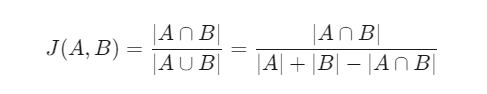


- Nếu tập A và B đều rỗng thì J(A,B) =1 . Giá trị J(A,B) luôn thỏa mãn điều kiện 0<=J(A,B)<=1

In [3]:
def Intersection_two_lst(lst1,lst2):
  new_lst=[]
  lst3 = lst2.copy()
  for i in lst1:
    if i in lst3:
      new_lst.append(i)
      lst3.remove(i) 
  return new_lst     


def Union_two_lst(lst1,lst2):
  newList = lst1 + lst2
  intersection = Intersection_two_lst(lst1,lst2)
  for i in intersection:
    newList.remove(i)
  return newList      

In [4]:
def jaccard_similarity(A, B): #Tính độ tương đồng 
  A = list(A)
  B = list(B)
  if len(A) == 0 and len(B) == 0:
    return 1
  inter_section = len(Intersection_two_lst(A,B))
  Union = len(Union_two_lst(A,B))
  return inter_section/Union*1.0

def jaccard_distance(A, B): #Tính Khoảng cách
  similar = jaccard_similarity(A,B)
  return 1 - similar  

#So sánh độ tương tự giữa 2 câu:

##Bag of Word

- Bag of Word hiểu một cách đơn giản với số lượng câu đã cho trích xuất các đặc trưng liên quan đến "từ" để biến các câu đó thành các vectơ , các vector này được sư dụng làm đầu vào cho các thuật toán machine learning
- VD: Cho 2 câu sau:
    + "Tôi yêu bạn lắm nè"
    + "Tôi yêu bố mẹ tui nhất trên đời"
- Bước 1 : Mã hóa các câu được cho: Loại bỏ các kí tự (hoặc từ được cho là vô nghĩa) nhằm để giảm thiếu không gian lưu trữ và thời gian xử lý các từ này 
- Bước 2: Từ các câu được cho chia các câu đó thành các phần như từ, từ khóa, cụm từ, ký hiệu và các thành phần khác. Sau đó từ các thành phần đó tạo thành một các gọi là "Dictionary" , "Dictionary" này chưa có từ được chia ở trên và các từ này là duy nhất ( đã loại bỏ các yếu tố gây nhiễu ví dụ như các dấu câu , khoảng cách). Dictionary sau bước này như VD trên là ['bạn', 'bố', 'lắm', 'mẹ', 'nhất', 'nè', 'trên', 'tui', 'tôi', 'yêu', 'đời'] 
- Bước 3 : Từ Dictionary để xác định các giá trị số phù hợp trong câu VD: "Tôi yêu bạn lắm nè" : [1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0.] và "Tôi yêu bố mẹ tui nhất trên đời" : [0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.]

In [5]:
import nltk
from nltk.corpus import stopwords #Import thư viện có các stop-word được định nghĩa sẵn để giúp hàm tự code giống thư viện hơn
nltk.download('stopwords')
stop_words = list(set(stopwords.words('english')))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
import re
import numpy as np
#Loại bỏ dấu câu và các từ mình cảm thấy không cần thiết nhằm tiết kiệm bộ nhớ và thời gian xử lý
def word_extraction(sentence):    
   ignore = ['a','i']  #Stopwords là các từ hay kí tự nào mà mình không muốn thêm vào dictionary
   #ignore = stop_words.copy()
   words = re.sub("[^\w]", " ",  sentence).split()    
   cleaned_text = [w.lower() for w in words if w.lower() not in ignore]    
   return cleaned_text

#Hình thành Dictionary từ việc trích xuất các từ trong câu
def create_dictionary(sentences):    
   Dictionary = []    
   for sentence in sentences:        
     w = word_extraction(sentence)        
     Dictionary.extend(w)            
   Dictionary = sorted(list(set(Dictionary)))    
   return Dictionary

#Xây dựng mô hình bag of word từ Dictionary
def generate_bow(allsentences):        
   Dictionary = create_dictionary(allsentences)    
   #print("Word List for Document \n{0} \n".format(Dictionary))
   vector_senten = {}
   for sentence in allsentences:        
    words = word_extraction(sentence)        
    bag_vector = np.zeros(len(Dictionary))        
    for w in words:            
      for i,word in enumerate(Dictionary):                
        if word == w:                     
         bag_vector[i] += 1                            
    vector_senten[sentence] = bag_vector
   return Dictionary,vector_senten  

##TF-IDF

- Tf-idf(term frequency-inverse document frequency) thường được sử dụng trong truy xuất thông tin và text mining. Nó là thước đó được sử dụng để đánh giá độ quan trọng của một từ với tập "tài liệu" được cho trước. Mức độ quan trong cao thể hiện với số lần từ ấy xuất hiện trong "tài liệu"
- Tf-idf có thể được sử dụng để lọc các stop-word(từ dừng) trong các vấn đề khác nhau bao gồm cả tóm tắt và phân loại văn bản 

- Cách tính: Trọng số TF-idf bao gồm 2 thuật ngữ:  
  -  Tf- term frequency : dùng để ước lượng tần xuất xuất hiện của từ trong văn bản. Tuy nhiên với mỗi văn bản thì có độ dài khác nhau, vì thế số lần xuất hiện của từ có thể nhiều hơn . Vì vậy số lần xuất hiện của từ sẽ được chia độ dài của văn bản (tổng số từ trong văn bản đó)

    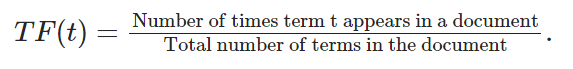
  - IDF- Inverse Document Frequency: dùng để ước lượng mức độ quan trọng của từ đó như thế nào . Khi tính tần số xuất hiện tf thì các từ đều được coi là quan trọng như nhau. Tuy nhiên có một số từ thường được được sử dụng nhiều nhưng không quan trọng để thể hiện ý nghĩa của đoạn văn
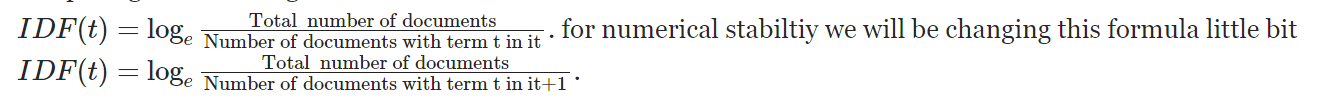

- VD: Một tài liệu gồm 100 từ trong đó từ "gấu" xuất hiện 5 lần khi đó TF("gấu")= 5/100 = 0.05. Giả sử ta có 10000 tài liệu và từ gấu xuất hiện trong 100 tài liệu thì IDF("gấu") = log(10000/100) = 2 -> TF-idf của "gấu" sẽ bằng 0.05*2=0.1

In [7]:
#Import các thư viện hỗ trợ
from collections import Counter
from scipy.sparse import csr_matrix
import math
import operator
from sklearn.preprocessing import normalize
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import math
import re
import os
import nltk
from nltk.corpus import stopwords #Import thư viện có các stop-word được định nghĩa sẵn để giúp hàm tự code giống thư viện hơn
nltk.download('stopwords')
stop_words = list(set(stopwords.words('english')))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#Hàm phụ trợ để giúp tách các từ trong câu và có 2 lựa chọn :
#+ Không cho các dâu câu vào "từ điển"(Dictionary) và các từ "stopword"
#+ Cho dấu câu vào từ điển

def all_lower(lst):
    return [x.lower() for x in lst]

def word_extraction_TF_IDF(sentence,option = 'A'):
  if option =='A':    
   ignore = ['a','i'] 
   #ignore = stop_words.copy() 
   words = re.sub("[^\w]", " ",  sentence).split()    
   cleaned_text = [w.lower() for w in words if w.lower() not in ignore] 
  else:
   cleaned_text = sentence.split(" ")
   cleaned_text = all_lower(cleaned_text)     
  return cleaned_text

#Hàm tạo ra "dictionary" với các thành phần trong đây là duy nhất
def create_dictionary_TFIDF(sentences,option = 'A'):
  Dictionary =[]
  for sentence in sentences:
    temp = word_extraction_TF_IDF(sentence,option)
    Dictionary+=temp
  Dictionary=sorted(list(set(Dictionary)))
  return Dictionary

#Tính toán giá trị IDF
def computeIDF(sentences,option = 'A'):
  idf ={}
  vocab = create_dictionary_TFIDF(sentences,option)
  for key in vocab:
    count = 0
    for sentence in sentences:     #Duyệt qua các câu trong tài liệu
      if key in word_extraction_TF_IDF(sentence,option):
        count+=1
    idf_key =  operator.add(1,math.log(operator.truediv(operator.add(1,len(sentences)),operator.add(1,count))))
    idf[key] = idf_key
  return idf   

def TF_IDF_transform(sentences,option = 'A'):
   if isinstance(sentences, (list,)):
     idf = computeIDF(sentences,option)
     dic_voca = {}
     idx_lst =[]
     key_idx_lst = []
     values =[]
     vocab = create_dictionary_TFIDF(sentences,option)
     for idx,key in enumerate(vocab):
       dic_voca[key] = idx
     for idx,sentence in enumerate(sentences):
       word_freq = dict(Counter(word_extraction_TF_IDF(sentence,option)))
       for key,freq in word_freq.items():
         if len(key) <2:
           continue

         key_index = dic_voca.get(key, -1)
         a=idf.get(key)
         f = (operator.mul(operator.truediv(freq,len(word_extraction_TF_IDF(sentence,option))),a))
         if key_index !=-1:
           idx_lst.append(idx)
           values.append(f)
           key_idx_lst.append(key_index)
     return normalize(csr_matrix((values, (idx_lst,key_idx_lst)), shape=(len(sentences),len(dic_voca)))).toarray() 
     #Convert thành mảng bỏ toarray cũng được sử dụng normalize dể chuẩn hóa lại tiện với so sánh với kết quả  vì thư viện Sklearn áp dụng chuẩn hóa L2 trên ma trận đầu ra của nó.
   else:
     raise ValueError("Input must be a list")


##Cosine

- Độ tương tự cosin là một cách đo độ tương tự (measure of similarity) giữa hai vectơ khác không của một không gian tích vô hướng

- Cho hai vectơ chứa các thuộc tính, A và B, độ tương tự cosine, cos(θ), được thể hiện bằng tích vô hướng và độ lớn là
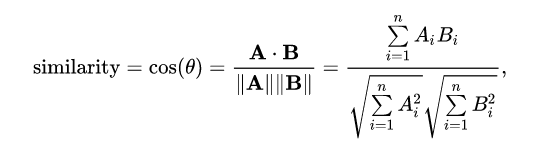
  - Với Ai và Bi là thành phần của vectơ A và B tương ứng.

In [9]:
import math
import numpy as np
def cosine_sim(u,v):
    return np.dot(u,v) / (math.sqrt(np.dot(u,u)) * math.sqrt(np.dot(v,v)))

#Test hàm tự code và so sánh với thư viện

##So sánh chuỗi mà không dùng thư viện hỗ trợ với 3 thuật toán
- Levenshtein. 

- Hamming distance.

- Jaccard

In [10]:
!pip install levenshtein
!pip install simphile



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import Levenshtein
from scipy.spatial import distance
from simphile import jaccard_list_similarity

In [24]:
def compare_text(text1,text2):
  print("- Thuật toán Levenshtein")
  print('   + Ma trận  khi so sánh 2 chuỗi:')
  result= levenshtein(text1,text2)
  print('   + Khoảng cách của 2 chuỗi khi sử dụng hàm tự code:',result)
  print('   + Kết quả khi sử dụng thư viện là:',Levenshtein.distance(text1,text2))
  print()
  print("- Thuật toán Hamming distance")
  print('   + Khoảng cách của 2 chuỗi khi sử dụng hàm tự code:',Hamming_distance(text1,text2))
  print('   + Kết quả khi sử dụng thư viện là:',distance.hamming(list(text1),list(text2)))
  print()
  print("- Thuật toán Jaccard")
  print('   + Khoảng cách của 2 chuỗi khi sử dụng hàm tự code:',jaccard_similarity(text1,text2))
  print('   + Kết quả khi sử dụng thư viện là:',jaccard_list_similarity(text1,text2))

In [25]:
lst_text =[]
number_text = int(input("Nhập số lượng từ muốn check: "))
for i in range(number_text):
  string = input("Nhập từ thứ "+str(i+1)+": ")
  lst_text.append(string)
while True:
  string1 = input("Nhập số thứ tự của 2 từ bạn muốn so sánh (Lưu ý cách nhau bỏi dấu cách) và nhập kí tự 'c' để thoát chương trình: ")
  if string1 == 'c':
    break 
  lst_str = string1.split(" ")
  if len(lst_str) !=2:
    raise ValueError('Bạn nhập sai số lượng từ bạn muốn so sánh')
  for i in  lst_str:
    if int(i)-1 >= number_text:
      raise ValueError('Số thứ tự của câu bị sai') 
  compare_text(lst_text[int(lst_str[0])-1],lst_text[int(lst_str[1])-1])   




Nhập số lượng từ muốn check: 2
Nhập từ thứ 1: tuimuon
Nhập từ thứ 2: bantuia
Nhập số thứ tự của 2 từ bạn muốn so sánh (Lưu ý cách nhau bỏi dấu cách) và nhập kí tự 'c' để thoát chương trình: 1 2
- Thuật toán Levenshtein
   + Ma trận  khi so sánh 2 chuỗi:
[[0. 1. 2. 3. 4. 5. 6. 7.]
 [1. 1. 2. 3. 3. 4. 5. 6.]
 [2. 2. 2. 3. 4. 3. 4. 5.]
 [3. 3. 3. 3. 4. 4. 3. 4.]
 [4. 4. 4. 4. 4. 5. 4. 4.]
 [5. 5. 5. 5. 5. 4. 5. 5.]
 [6. 6. 6. 6. 6. 5. 5. 6.]
 [7. 7. 7. 6. 7. 6. 6. 6.]]
   + Khoảng cách của 2 chuỗi khi sử dụng hàm tự code: 6.0
   + Kết quả khi sử dụng thư viện là: 6

- Thuật toán Hamming distance
   + Khoảng cách của 2 chuỗi khi sử dụng hàm tự code: 0.8571428571428571
   + Kết quả khi sử dụng thư viện là: 0.8571428571428571

- Thuật toán Jaccard
   + Khoảng cách của 2 chuỗi khi sử dụng hàm tự code: 0.4
   + Kết quả khi sử dụng thư viện là: 0.4
Nhập số thứ tự của 2 từ bạn muốn so sánh (Lưu ý cách nhau bỏi dấu cách) và nhập kí tự 'c' để thoát chương trình: c


##So sánh độ tương tự giữa 2 câu:

- Bag of Word

- TF-IDF

- Cosine

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def Bag_of_word_lib(str_lst):
  vectorizer = CountVectorizer()
  vectorizer.fit(str_lst)
  vector = vectorizer.transform(str_lst)
  return sorted(list(vectorizer.vocabulary_)),vector.toarray()

def TF_IDF_lib(str_lst):
  vectorizer = TfidfVectorizer()
  X = vectorizer.fit_transform(str_lst)
  return sorted(list(vectorizer.get_feature_names_out())),X.toarray()

In [28]:
def compare_string(str_lst):
  print("Trong một số trường hợp kết quả sẽ khác vì thư viện sẽ mặc định sẽ loại bỏ các từ 'stopword' ")
  print("-Thuật toán Bag of Word")
  dic ,vec = generate_bow(str_lst)
  dic_lib,vector = Bag_of_word_lib(str_lst)
  print("   + Dictionary của hàm tự code:",dic)
  print("   + Dictionary của thư viện:",dic_lib)
  print("   + Kết quả khi chạy bằng hàm tự code:")
  for i,key in enumerate(list(vec.values())):
    print("Bag of word của câu thứ",i+1,"là:",key)
  print("   + Kết quả khi sử dụng thư viện :")
  for i,key in enumerate(vector):
    print("Bag of word của câu thứ",i+1,"là:",key)  
  print()
  print("-Thuật toán TF-IDF")
  vec_TF_IDF = TF_IDF_transform(str_lst)
  lib_tf,vector_tf = TF_IDF_lib(str_lst) 
  print("   + Dictionary của hàm tự code:",create_dictionary_TFIDF(str_lst))
  print("   + Dictionary của thư viện:",lib_tf)
  print("   + Kết quả khi chạy bằng hàm tự code:")
  for i,key in enumerate(vec_TF_IDF):
    print("TFIDF của câu thứ",i+1,"là:",key)
  print("   + Kết quả khi sử dụng thư viện :")
  for i,key in enumerate(vector_tf):
    print("TFIDF của câu thứ",i+1,"là:",key)    
  print()  
  print("- Sử dụng cosine kết hợp vói 2 thuật toán tính độ tương tự giữa 2 câu")
  print("   + Độ tương tự của 2 câu kết hợp Bag of word và Cosine",cosine_sim(list(vec.values())[0],list(vec.values())[1]))
  print("   + Độ tương tự của 2 câu kết hợp TFIDF và Cosine",cosine_sim(vec_TF_IDF[0],vec_TF_IDF[1]))




In [29]:
str_lst = []
for i in range(2):
  string = input("Nhập câu thứ "+str(i)+":")
  str_lst.append(string)
compare_string(str_lst)

Nhập câu thứ 0:I love you not because of who you are, but because of who I am when I am with you
Nhập câu thứ 1:To the world you may be one person, but to one person you may be the world
Trong một số trường hợp kết quả sẽ khác vì thư viện sẽ mặc định sẽ loại bỏ các từ 'stopword' 
-Thuật toán Bag of Word
   + Dictionary của hàm tự code: ['am', 'are', 'be', 'because', 'but', 'love', 'may', 'not', 'of', 'one', 'person', 'the', 'to', 'when', 'who', 'with', 'world', 'you']
   + Dictionary của thư viện: ['am', 'are', 'be', 'because', 'but', 'love', 'may', 'not', 'of', 'one', 'person', 'the', 'to', 'when', 'who', 'with', 'world', 'you']
   + Kết quả khi chạy bằng hàm tự code:
Bag of word của câu thứ 1 là: [2. 1. 0. 2. 1. 1. 0. 1. 2. 0. 0. 0. 0. 1. 2. 1. 0. 3.]
Bag of word của câu thứ 2 là: [0. 0. 2. 0. 1. 0. 2. 0. 0. 2. 2. 2. 2. 0. 0. 0. 2. 2.]
   + Kết quả khi sử dụng thư viện :
Bag of word của câu thứ 1 là: [2 1 0 2 1 1 0 1 2 0 0 0 0 1 2 1 0 3]
Bag of word của câu thứ 2 là: [0 0 2 0 1 0 2 0